# Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_theme()

# Import Data, Quick Exploration & Change Data Format

In [2]:
# Import Data
data = pd.read_csv('ecommerce_dataset.csv')

In [3]:
data.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,...,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,...,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,...,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,...,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,...,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status              584524 non-null  object 
 14   MV                    584524 non-

# Drop Unused Columns

In [5]:
data.columns

Index(['item_id', 'status', 'created_at', 'sku', 'price', 'qty_ordered',
       'grand_total', 'increment_id', 'category_name_1',
       'sales_commission_code', 'discount_amount', 'payment_method',
       'Working Date', 'BI Status', ' MV ', 'Year', 'Month', 'Customer Since',
       'M-Y', 'FY', 'Customer ID', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [6]:
# drop unused columns
data.drop(columns=[' MV ', 'Year', 'Month', 'Customer Since', 'M-Y', 'FY', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25'], inplace=True)

In [7]:
# quick check data distribution
data.describe()

,item_id,price,qty_ordered,grand_total,discount_amount,Customer ID
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584513.000000
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,45790.511965
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,34414.962389
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,1.000000
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,13516.000000
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,42856.000000
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,73536.000000
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,115326.000000


In [8]:
data = data[data.grand_total > 0]

In [9]:
# check null values
data.isnull().sum()

item_id                       0
status                       15
created_at                    0
sku                           5
price                         0
qty_ordered                   0
grand_total                   0
increment_id                  0
category_name_1             163
sales_commission_code    134206
discount_amount               0
payment_method                0
Working Date                  0
BI Status                     0
Customer ID                  11
dtype: int64

In [10]:
# drop null values
data = data.dropna()

In [11]:
data.info()
data.created_at = pd.to_datetime(data.created_at)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440605 entries, 0 to 584491
Data columns (total 15 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                440605 non-null  float64
 1   status                 440605 non-null  object 
 2   created_at             440605 non-null  object 
 3   sku                    440605 non-null  object 
 4   price                  440605 non-null  float64
 5   qty_ordered            440605 non-null  float64
 6   grand_total            440605 non-null  float64
 7   increment_id           440605 non-null  object 
 8   category_name_1        440605 non-null  object 
 9   sales_commission_code  440605 non-null  object 
 10  discount_amount        440605 non-null  float64
 11  payment_method         440605 non-null  object 
 12  Working Date           440605 non-null  object 
 13  BI Status              440605 non-null  object 
 14  Customer ID            440605 non-nu

In [12]:
# rename columns
data.rename(columns={
    'category_name_1':'category_name',
    'Working Date':'Working_Date',
    'BI Status':'BI_Status',
    'Customer ID':'Customer_ID'
}, inplace=True)

In [13]:
# simplify payment status
data.status = data.status.replace({
    'complete':'Completed',
    'received':'Completed',
    'cod':'Completed',
    'paid':'Completed',
    'closed':'Completed',
    'exchange':'Completed',
    'canceled':'Canceled',
    'order_refunded':'Canceled',
    'refund':'Canceled',
    'fraud':'Canceled',
    '\\N':'Canceled',
    'payment_review':'Pending',
    'pending':'Pending',
    'processing':'Pending',
    'holded':'Pending',
    'pending_paypal':'Pending'
})

# Cohort Retension

In [14]:
cohort = pd.DataFrame(data)

In [15]:
cohort = cohort[cohort.status == 'Completed']

In [16]:
# sort data based on Customer ID & Order Date
cohort.sort_values(['Customer_ID', 'created_at'], inplace=True)
cohort.reset_index(inplace=True, drop=True)

In [17]:
# count investor transaction
def purchase_rate(Customer_ID):
    purchase_rate = [1]
    counter = 1
    for i in range(1, len(Customer_ID)):
        if Customer_ID[i] != Customer_ID[i - 1]:
            purchase_rate.append(1)
        else:
            counter += 1
            purchase_rate.append(counter)
    return purchase_rate
cohort['purchase_rate'] = purchase_rate(cohort['Customer_ID'])

In [18]:
cohort.head()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name,sales_commission_code,discount_amount,payment_method,Working_Date,BI_Status,Customer_ID,purchase_rate
0,211131.0,Completed,2016-07-01,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,1.0,1
1,473369.0,Completed,2017-05-19,BT_BT-422,530.0,1.0,1245.0,100306394,Men's Fashion,\N,0.0,cod,5/19/2017,Net,3.0,1
2,473370.0,Completed,2017-05-19,ALHAMRA_US-0961-K,299.0,1.0,1245.0,100306394,Men's Fashion,\N,0.0,cod,5/19/2017,Net,3.0,2
3,473371.0,Completed,2017-05-19,e-seller_7,66.0,1.0,1245.0,100306394,Mobiles & Tablets,\N,0.0,cod,5/19/2017,Net,3.0,3
4,473372.0,Completed,2017-05-19,BD_BIG DEAL_16,350.0,1.0,1245.0,100306394,Mobiles & Tablets,\N,0.0,cod,5/19/2017,Net,3.0,4


In [19]:
# get first transaction date
def first_trans(purchase_rate, created_at):
    first_trans = list(range(len(created_at)))
    for i in range(len(purchase_rate)):
        if purchase_rate[i] == 1:
            first_trans[i] = created_at[i]
        else:
            first_trans[i] = first_trans[i - 1]
    return first_trans
cohort['first_trans_date'] = first_trans(cohort['purchase_rate'], cohort['created_at'])

In [20]:
# extract created_at & first_trans_date to month & year format
cohort['month'] = pd.to_datetime(cohort['created_at']).dt.month
cohort['year'] = pd.to_datetime(cohort['created_at']).dt.year
cohort['first_trans_month'] = pd.to_datetime(cohort['first_trans_date']).dt.month
cohort['first_trans_year'] = pd.to_datetime(cohort['first_trans_date']).dt.year

In [21]:
# count retension ages
def age_by_month(purchase_rate, month, year, first_trans_month, first_trans_year):
    age_by_month = list(range(len(year)))
    for i in range(len(purchase_rate)):
        if purchase_rate[i] == 1:
            age_by_month[i] = 0
        else:
            if year[i] == first_trans_year[i]:
                age_by_month[i] = month[i] - first_trans_month[i]
            else:
                age_by_month[i] = month[i] - first_trans_month[i] + 12*(year[i] - first_trans_year[i])
    return age_by_month
cohort['age_transaction'] = age_by_month(cohort['purchase_rate'], cohort['month'], cohort['year'], cohort['first_trans_month'], cohort['first_trans_year'])

In [22]:
# change first_trans_date to month & year format
cohort['first_trans_month_year'] = pd.to_datetime(cohort['first_trans_date'].dt.strftime('%Y-%m'))

In [25]:
# grouping data
cohort_retension = cohort.groupby(['first_trans_month_year', 'age_transaction']).nunique()
cohort_retension = cohort_retension.Customer_ID.to_frame().reset_index()
cohort_retension = pd.pivot_table(cohort_retension, values='Customer_ID', index='first_trans_month_year', columns='age_transaction')
cohort_retension.replace(np.nan, '', regex=True)

age_transaction,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
first_trans_month_year,,,,,,,,,,,,,,,,,,,,,
2016-07-01,1565.0,303.0,279.0,225.0,337.0,196.0,172.0,150.0,176.0,168.0,...,127.0,58.0,13.0,19.0,19.0,13.0,17.0,11.0,8.0,11.0
2016-08-01,2294.0,256.0,205.0,325.0,146.0,128.0,110.0,119.0,112.0,96.0,...,52.0,10.0,8.0,11.0,5.0,6.0,4.0,3.0,8.0,
2016-09-01,3198.0,390.0,715.0,206.0,197.0,146.0,214.0,224.0,244.0,127.0,...,11.0,9.0,9.0,3.0,7.0,2.0,1.0,8.0,,
2016-10-01,1901.0,369.0,145.0,127.0,97.0,110.0,111.0,104.0,51.0,55.0,...,4.0,4.0,3.0,,2.0,1.0,2.0,,,
2016-11-01,10987.0,819.0,447.0,374.0,462.0,461.0,529.0,298.0,380.0,349.0,...,19.0,8.0,13.0,9.0,8.0,13.0,,,,
2016-12-01,1999.0,183.0,104.0,108.0,71.0,76.0,33.0,51.0,51.0,14.0,...,1.0,4.0,,1.0,,,,,,
2017-01-01,1878.0,133.0,96.0,99.0,79.0,52.0,48.0,47.0,27.0,31.0,...,12.0,1.0,2.0,1.0,,,,,,
2017-02-01,2146.0,185.0,102.0,78.0,46.0,63.0,48.0,23.0,21.0,67.0,...,2.0,,,,,,,,,
2017-03-01,3393.0,249.0,167.0,89.0,105.0,85.0,30.0,48.0,130.0,45.0,...,1.0,1.0,,,,,,,,


In [26]:
# convert number to percentage
for i in range(len(cohort_retension) - 1):
    cohort_retension[i+1] = cohort_retension[i+1]/cohort_retension[0]
cohort_retension[0] = cohort_retension[0]/cohort_retension[0]

In [27]:
cohort_retension

age_transaction,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
first_trans_month_year,,,,,,,,,,,,,,,,,,,,,
2016-07-01,1.0,0.193610,0.178275,0.143770,0.215335,0.125240,0.109904,0.095847,0.112460,0.107348,...,0.081150,0.037061,0.008307,0.012141,0.012141,0.008307,0.010863,0.007029,0.005112,0.007029
2016-08-01,1.0,0.111595,0.089364,0.141674,0.063644,0.055798,0.047951,0.051874,0.048823,0.041848,...,0.022668,0.004359,0.003487,0.004795,0.002180,0.002616,0.001744,0.001308,0.003487,NaN
2016-09-01,1.0,0.121951,0.223577,0.064415,0.061601,0.045654,0.066917,0.070044,0.076298,0.039712,...,0.003440,0.002814,0.002814,0.000938,0.002189,0.000625,0.000313,0.002502,NaN,NaN
2016-10-01,1.0,0.194108,0.076276,0.066807,0.051026,0.057864,0.058390,0.054708,0.026828,0.028932,...,0.002104,0.002104,0.001578,NaN,0.001052,0.000526,0.001052,NaN,NaN,NaN
2016-11-01,1.0,0.074543,0.040684,0.034040,0.042050,0.041959,0.048148,0.027123,0.034586,0.031765,...,0.001729,0.000728,0.001183,0.000819,0.000728,0.001183,NaN,NaN,NaN,NaN
2016-12-01,1.0,0.091546,0.052026,0.054027,0.035518,0.038019,0.016508,0.025513,0.025513,0.007004,...,0.000500,0.002001,NaN,0.000500,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-01,1.0,0.070820,0.051118,0.052716,0.042066,0.027689,0.025559,0.025027,0.014377,0.016507,...,0.006390,0.000532,0.001065,0.000532,NaN,NaN,NaN,NaN,NaN,NaN
2017-02-01,1.0,0.086207,0.047530,0.036347,0.021435,0.029357,0.022367,0.010718,0.009786,0.031221,...,0.000932,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-03-01,1.0,0.073386,0.049219,0.026230,0.030946,0.025052,0.008842,0.014147,0.038314,0.013263,...,0.000295,0.000295,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


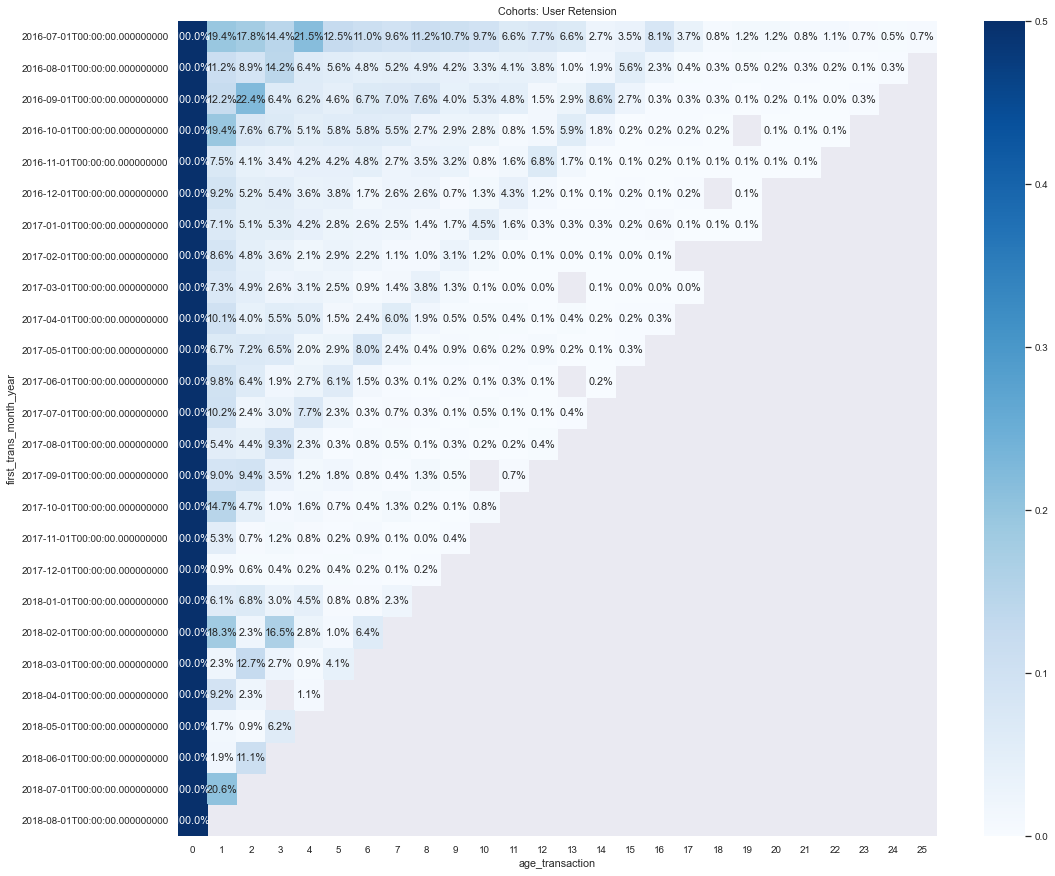

In [38]:
# visualization section
plt.figure(figsize=(17, 15))
plt.title('Cohorts: User Retension')
sns.set(font_scale = 0.9)
sns.heatmap(cohort_retension, mask=cohort_retension.isnull(), 
cmap="Blues", annot=True, fmt='.01%', vmin='0.0', vmax='0.5')
plt.show()

# Conclusion

from this chart we can see user doing transaction more than 1 times. we can see at 2018 there are higher retension than other year. from this chart we can make some decision for user or company.

Not only for retension, this chart also can visualize user churn.